## Useful codes for Dictionaries


In [69]:
fruits1= {'Bananas':10, 'Strawberries':5, 'Pineapple':20}
fruits2= {'Apples':9, 'Watermelon':8, 'Orange':4}

{**fruits1, **fruits2}           # **split the dict, then combine both fruit1 and fruit2 dictionary

fruits1.keys()                   # show all keys in dict
fruits1.values()                 # show all values in dict
fruits1.get("orange",0)	         # return 0 instead of error if orange not found in dict

for a,b in fruits1.items():      # return key value pair in tuple pairs
    print (a,b)
    
import pandas as pd
pd.DataFrame.from_dict({'Qty':fruits1})  #convert dict to DF


Bananas 10
Strawberries 5
Pineapple 20


,Qty
Bananas,10
Pineapple,20
Strawberries,5


## Useful codes for Strings

In [79]:
#Basics
x="Hello World"
x.split("e")              
x.find('c'); x.find('c',4); x.rfind('c'); x.count('c')
x.replace('quick','lazy',2)
x.upper(); x.lower()
"/t".join(["quick","brown","fox"])
x.strip(); x.rstrip(); x.lstrip()
r"  ./' "                 #return exact strings in " " r means raw.

#Using Regex
import re
re.search(x,"H")
re.findall(r"[csm]at",x)    # find all cat sat mat in string
re.findall(r"[^c]at",x)     # find all *at (eg sat mat) EXCEPT cat in string
re.search('(\w)\s(\w?)',x)      # using groups to extract necessary information from string


# Regex Cheat Sheet: http://www.rexegg.com/regex-quickstart.html
# Regex crossword game: https://regexcrossword.com/

<_sre.SRE_Match object; span=(4, 7), match='o W'>

## Useful codes for data cleaning


In [80]:
import pandas as pd

In [106]:
df = pd.read_csv("02 Python Basic/data/genes.csv")    # or read_table
df.head()
df.shape
df.describe()
df["Locus"].unique()
df.groupby("HUGO Symbol").sum().sort_values(by="Unnamed: 0",ascending=False).head()
df.drop_duplicates(subset=["Gene product","Associated disease"]).head(3)

,Unnamed: 0,HUGO Symbol,Locus,Gene product,Associated disease,Notes,Genecard
0,1,ABO,NaN,Glycosyl transferases,--,Determinant of blood type (ABO),NaN
1,2,ALB,4,Serum albumin,--,The most abundant protein in human blood plasma,GeneCard for ALB
2,3,BCL2,18q21.3,Apoptosis regulator Bcl-2 / B-cell CLL/lymphoma 2,Several cancers,The prototype anti-apoptotic protein,GeneCard for BCL2


In [108]:
### Clean data in Column --> use .apply 
def cleandata(s):
    s2=s                  # write what to do with the data here
    return (s2)
df["Locus"].apply(cleandata)

0               NaN
1                 4
2           18q21.3
3              3p21
4        12pter-p12
5              2p12
6          4q26-q27
7          1q31-q32
8             17q21
9          13q12-13
10             2q33
11            15q22
12          19p13.3
13         5q21-q22
14             1q31
15            11p13
16           7q31.2
17          16p13.3
18             8q13
19             2q21
20     5q11.2-q13.2
21           6p21.3
22        17q12-q21
23            12q13
24          11q13.1
25          Xp11.22
26         3q21-q24
27       1p36.1-p35
28             1q21
29            11q23
30           Yp11.3
31             9q34
32          16p13.3
33          16p13.3
34            21q21
35            17q21
36          11p15.5
37       1p35-p34.3
38           7q31.3
39    22q12.1-q12.2
40             2q21
41            14q12
42          11p15.4
43           1p36.2
44    22q12.1-q12.2
45    16p11.2-q12.1
46         7q32-q36
47            10q25
Name: Locus, dtype: object

## Geolocation


In [1]:
key=""  # bing map key

In [9]:
import pandas as pd
df=pd.read_table("03 Data Acquisition/data/ricacorp-real-estate-sales.tsv",encoding="utf-16")

In [10]:
df=df.drop(["web-scraper-order","web-scraper-start-url","pagination","pagination-href","last updated","loan %","1st payment"],axis=1)

In [13]:
import re
def sqftprice(s):
    n=re.search(r"(?:\$)(\d+)(?:\,?)(\.?)(\d*)(k?)",s)
    if n.group(4)!="k":
        val=float(n.group(1)+n.group(2)+n.group(3))/1000
    else:
        val=float(n.group(1)+n.group(2)+n.group(3))
        return val

In [14]:
df["sqftprice"]=df["area"].apply(sqftprice)

In [15]:
df.sort_values(by="sqftprice",ascending=False)

,Area,characteristic,floor type,hkd millions,rent hkd,area,address,pay per month,sqftprice
2443,Kowloon,"Good Security, 5-Star Club House",High Floor Zone (Flat B) ...,168.00,Rent $170k\n ...,"Area :\n1,842Ft ($91.2k/Ft)",Kowloon Station Flat B Sun Tower (Tower 1A) Th...,Pay/M︰$445.1k,91.2
7685,New Territories West,"Rare Offer, Cosmopolitan Living",High Floor Zone (Flat A) ...,238.00,null,"Area :\n2,615Ft ($91k/Ft)",Kennedy Town/Sai Yin Pun Flat A Harbour One ...,Pay/M︰$630.5k,91.0
2256,Kowloon,"Forgotten Treasure, Unique Location",Medium Floor Zone (Flat A) ...,168.00,null,"Area :\n1,955Ft ($85.9k/Ft)",Kowloon Station Flat A Sky Tower (Tower 1) The...,Pay/M︰$445.1k,85.9
3400,Kowloon,"Long Completion Date, Rare Offer",High Floor Zone,59.80,null,Area :\n717Ft ($83.4k/Ft),Olympic Station Tower 3 Central Park Park Ave...,Pay/M︰$158.4k,83.4
3351,Kowloon,NaN,Low Floor Zone (Flat B) ...,55.00,null,Area :\n707Ft ($77.7k/Ft),Olympic Station Flat B Tower 8 One Silversea ...,Pay/M︰$145.7k,77.7
3156,Kowloon,"High Efficiency, High Privacy",Medium Floor Zone (Flat D),76.00,null,Area :\n994Ft ($76.4k/Ft),Ho Man Tin/King's Park Flat D Tower 1 Phase 2 ...,Pay/M︰$201.3k,76.4
100,Kowloon,NaN,High Floor Zone (Flat B),98.00,null,"Area :\n1,288Ft ($76k/Ft)",Kowloon Station Flat B Tower 21 - Zone 6 (Aste...,Pay/M︰$259.6k,76.0
657,Kowloon,"Landmark Development, Top Of Mtr",High Floor Zone (Flat A) ...,98.00,null,"Area :\n1,300Ft ($75.3k/Ft)",Kowloon Station Flat A Moon Tower (Tower 2A) T...,Pay/M︰$259.6k,75.3
317,Kowloon,NaN,Low Floor Zone (Flat A) ...,55.00,null,Area :\n742Ft ($74.1k/Ft),Olympic Station Flat A Tower 8 One Silversea ...,Pay/M︰$145.7k,74.1
1328,Kowloon,"Top Of Mtr, 5-Star Club House",High Floor Zone (Flat E) ...,180.00,null,"Area :\n2,428Ft ($74.1k/Ft)",Kowloon Station Flat E The Masterpiece High ...,Pay/M︰$476.9k,74.1


In [16]:
address=df["address"][:50]

In [19]:
## Bing REST API

import geocoder
lat=[]
lng=[]
city=[]

for i in range(len(address)):
    g = geocoder.bing(("Hong Kong, "+ address[i]),key='AoiG7rY8d7HlxbpFHZqy1qHLaO93I0vdN2cExiGYNF-IdyYY51Gl7gVK5bP9CS3w')
    lat.append(g.json["lat"])
    lng.append(g.json["lng"])
    try: 
        city.append(g.json["city"])
    except:
        city.append("empty")
    

In [501]:
# Data cleaning for batch geocoding
address=["Hong Kong, "+ x for x in address]
address=[x.encode('utf-8') for x in address]


In [502]:
# Batch geocoding
g = geocoder.bing(address,method='batch',key='AoiG7rY8d7HlxbpFHZqy1qHLaO93I0vdN2cExiGYNF-IdyYY51Gl7gVK5bP9CS3w')
for result in g:
    print(result.latlng)

Bing Spatial Data Services, 2.0
Id,GeocodeRequest/Query,GeocodeResponse/Point/Latitude,GeocodeResponse/Point/Longitude
0,"b'Hong Kong, Kowloon Tong/Beacon Hill Flat 3 Block A Peninsula Heights  High Floor Zone'",,
1,"b'Hong Kong, Cheung Sha Wan West Flat - Tower 1 Phase 2 The Pacifica High Floor Zone'",,
2,"b'Hong Kong, Kowloon Station Flat E Tower 2 Phase 1 The Waterfront Low Floor Zone'",,
3,"b'Hong Kong, Cheung Sha Wan West Flat - Tower 2 One West Kowloon  Low Floor Zone'",,
4,"b'Hong Kong, Whampoa/Laguna Verde Flat AB Tower 10 Phase 2 Villa Verde Laguna Verde Low Floor Zone'",,
5,"b'Hong Kong, Tseung Kwan O Flat A Tower 7 The Wings The Wings High Floor Zone'",,
6,"b'Hong Kong, Tseung Kwan O Flat K Block 3 The Grandiose  High Floor Zone'",,
7,"b'Hong Kong, Kowloon Tong/Beacon Hill Flat D Tower 10 Phase 1 One Beacon Hill Medium Floor Zone'",,
8,"b'Hong Kong, Cheung Sha Wan West Flat - Tower 5 Phase 3 Banyan Garden High Floor Zone'",,
9,"b'Hong Kong, Tseung Kwan O Flat F Tower 3 Phase

In [23]:
import folium

# Isolating "northing" and "easting" information with labels for each point
#locationlist = df_nearme[["Latitude","Longitude"]].values.tolist()
#labels = df_nearme["Cafe Name"].values.tolist()

# Create map and drop points onto it
m = folium.Map(location=[22.28395, 114.12964], zoom_start=14)

In [24]:
for i in range(len(lat)):
    folium.Marker([lat[i],lng[i]],popup=str(i)+city[i]).add_to(m)


In [25]:
m

In [476]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




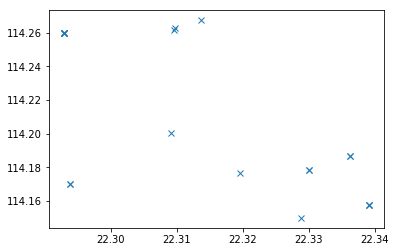

In [480]:
plt.plot(lat,lng,linestyle='none',marker='x')
